In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from data_preprocess import Preprocessor

In [8]:
df_n0 = pd.read_csv("data/final/1936/normal/NormalMotor_1936_20.csv", header=None)
df_n1 = pd.read_csv("data/final/1936/normal/NormalMotor_1936_30.csv", header=None)
df_n2 = pd.read_csv("data/final/1936/normal/NormalMotor_1936_40.csv", header=None)
df_n3 = pd.read_csv("data/final/1936/normal/NormalMotor_1936_50.csv", header=None)

In [11]:
data_df = [
    [df_n0, (0, 1, 2, 3), 20000, (20,), "nnnn"],
    [df_n1, (0, 1, 2, 3), 20000, (30,), "nnnn"],
    [df_n2, (0, 1, 2, 3), 20000, (50,), "nnnn"],
    [df_n3, (0, 1, 2, 3), 20000, (60,), "nnnn"]
]

In [12]:
data_interval = 4
preprocessor = Preprocessor(max_freq=600, kaiser_beta=10)

In [13]:
dataset = preprocessor.compute_preprocess(data_df, data_interval, shuffle=True, keep_channels_separate=False)

c:\Users\rarora\DataspellProjects\PredictiveAnalysis\venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


1 of 4 finished
2 of 4 finished
3 of 4 finished
4 of 4 finished


In [14]:
X_with_hz = dataset[:, :-1]
y = dataset[:, -1]

y = preprocessor.one_hot_encode(y)

In [15]:
trainXhz, testXhz, y_train, y_test = train_test_split(X_with_hz, y, test_size=0.12)
trainXhz, valXhz, y_train, y_val = train_test_split(trainXhz, y_train, test_size=0.12)

X_train = trainXhz[:, :-1]
X_val = valXhz[:, :-1]
X_test = testXhz[:, :-1]

train_hz = trainXhz[:, -1]
val_hz = valXhz[:, -1]
test_hz = testXhz[:, -1]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(train_hz.shape)
print(val_hz.shape)
print(test_hz.shape)

(3791, 2401)
(517, 2401)
(588, 2401)
(3791, 3)
(517, 3)
(588, 3)
(3791,)
(517,)
(588,)


In [20]:
model = keras.models.load_model('models/cnn_non_mapping_oven1.keras')

In [21]:
#freeze all layers except the last 2
for layer in model.layers[:-4]:
    layer.trainable = False

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit([X_train, train_hz], y_train, epochs=8, batch_size=32, validation_data=([X_val, val_hz], y_val))

Epoch 1/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1381 - loss: 5.5911 - val_accuracy: 0.3926 - val_loss: 2.1863
Epoch 2/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4658 - loss: 2.0105 - val_accuracy: 0.7814 - val_loss: 0.6371
Epoch 3/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7499 - loss: 0.7190 - val_accuracy: 0.9246 - val_loss: 0.2138
Epoch 4/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8905 - loss: 0.3287 - val_accuracy: 0.9710 - val_loss: 0.0893
Epoch 5/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9438 - loss: 0.1706 - val_accuracy: 0.9903 - val_loss: 0.0456
Epoch 6/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9615 - loss: 0.1135 - val_accuracy: 0.9942 - val_loss: 0.0259
Epoch 7/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9810 - loss: 0.0691 - val_accuracy: 0.9961 - val_loss: 0.0164
Epoch 8/8
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9884 - loss: 0.0472 - val_accuracy: 1.

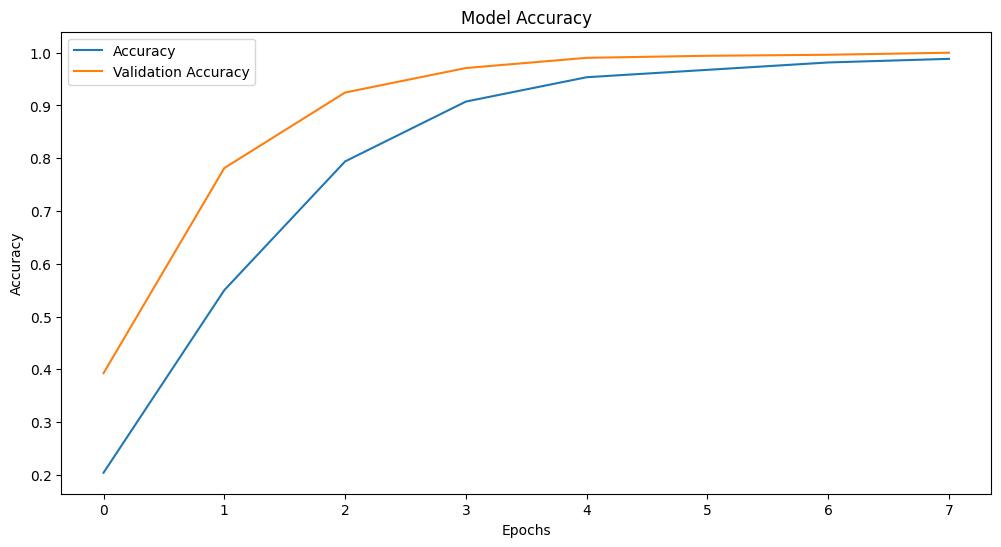

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

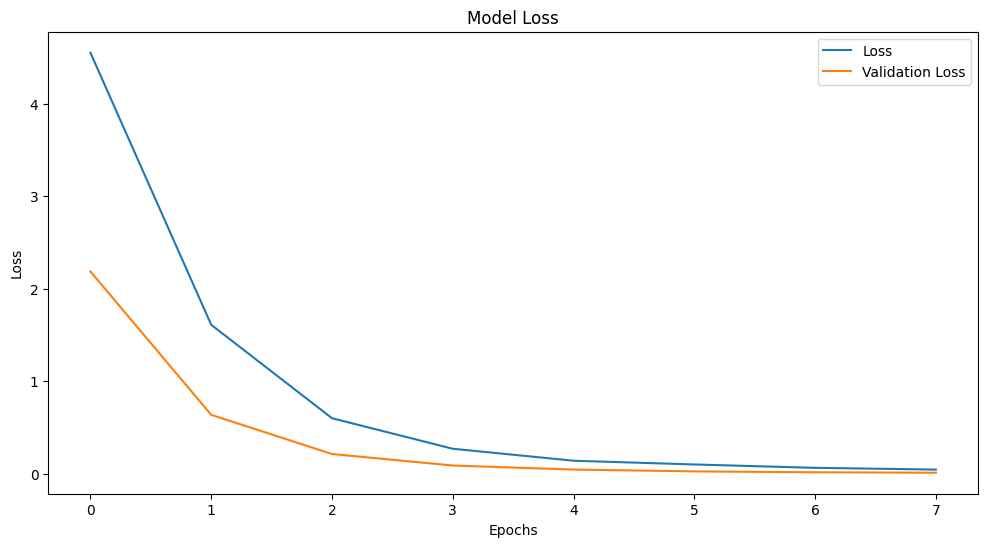

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [26]:
model.evaluate([X_test, test_hz], y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9988 - loss: 0.0139


[0.014679573476314545, 0.9982993006706238]

In [27]:
model.save('models/cnn_non_mapping_oven1_adjust_oven2.keras')